In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

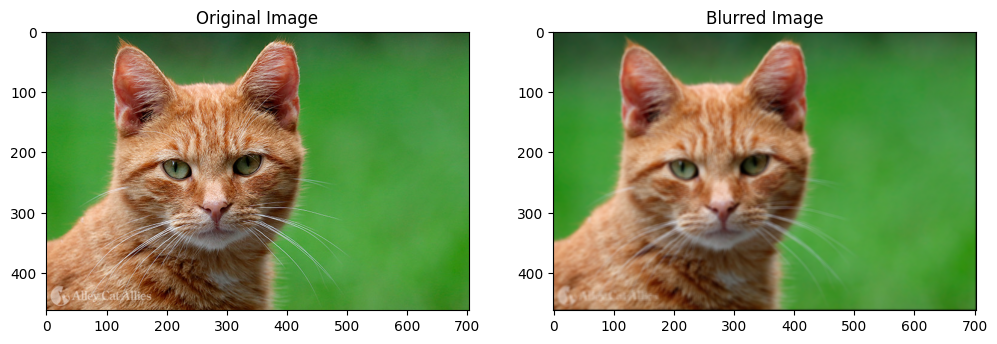

In [8]:
def averaging_filter(image_path):
    kernel_size = (5, 5)
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    h, w, c = img.shape
    pad_size = kernel_size[0] // 2
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
    blurred_img = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i + kernel_size[0], j:j + kernel_size[1]]
            blurred_img[i, j] = np.mean(region, axis=(0, 1))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(blurred_img)
    plt.title("Blurred Image")
    plt.show()

averaging_filter("img.jpg")


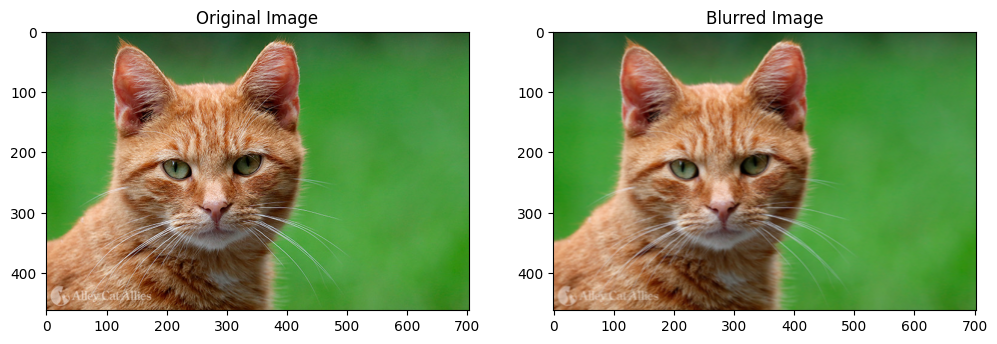

In [12]:
def weightedFilter(img,kernel):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    averagedImage = cv.filter2D(img,-1,kernel)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")


    plt.subplot(1,2,2)
    plt.imshow(averagedImage)
    plt.title("Blurred Image")

filter = np.array([[1,3,6,1],[8,9,9,7],[1,2,3,5]])
kernel = filter/(np.sum(filter))
weightedFilter("img.jpg",kernel)

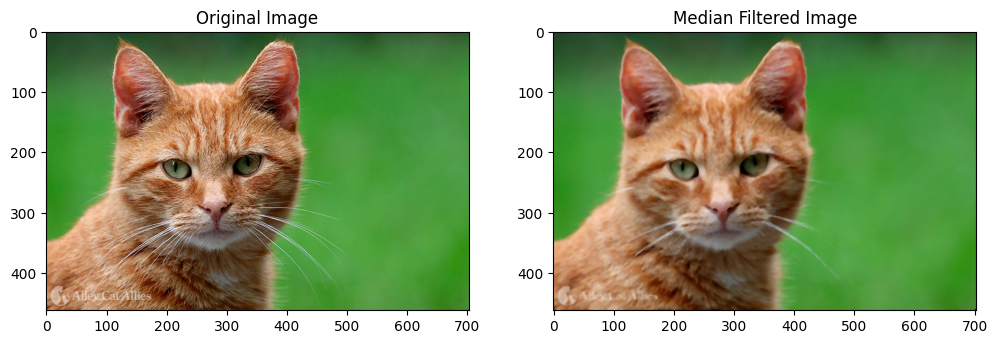

In [13]:
def median_filter(image_path, kernel_size):
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    pad_size = kernel_size // 2
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
    h, w, c = img.shape
    median_filtered_img = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            for channel in range(c):
                region = padded_img[i:i + kernel_size, j:j + kernel_size, channel]
                median_filtered_img[i, j, channel] = np.median(region)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(median_filtered_img)
    plt.title("Median Filtered Image")
    plt.show()

median_filter("img.jpg", 5)


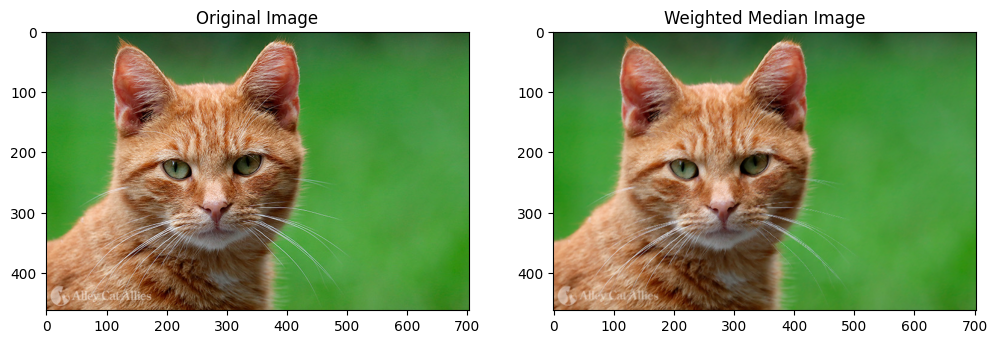

In [14]:
def applyWeightedMedianFilter(img, kernel, weights):
    img = cv.imread(img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    pad = kernel // 2
    paddedImg = cv.copyMakeBorder(img, pad, pad, pad, pad, cv.BORDER_REFLECT)
    height, width, _ = img.shape
    newImg = np.zeros((height, width, 3), dtype=np.uint8)
    weights_flat = weights.flatten()
    total_weights = np.sum(weights_flat)

    for i in range(height):
        for j in range(width):
            region = paddedImg[i:i+kernel, j:j+kernel]
            region_flat = region.reshape(-1, 3)
            weighted_values = []

            for k in range(len(region_flat)):
                pixel_value = region_flat[k]
                weight = weights.flatten()[k]
                weighted_values.extend([pixel_value] * weight)
            
            weighted_values = np.array(weighted_values)
            medians = np.median(weighted_values, axis=0)

            newImg[i, j] = medians.astype(np.uint8)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(newImg)
    plt.title("Weighted Median Image")
    plt.show()

weights = np.array([[1, 2, 3], [2, 3, 0], [7, 2, 1]])
applyWeightedMedianFilter("img.jpg", weights.shape[0], weights)


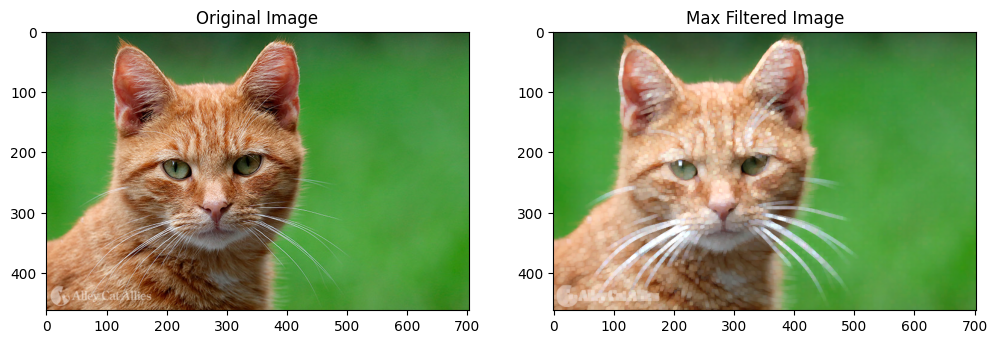

In [17]:
def maxFilter(img_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    kernel_size = 5
    pad = kernel_size // 2
    padded_img = cv.copyMakeBorder(img, pad, pad, pad, pad, cv.BORDER_REFLECT)
    height, width, channels = img.shape
    max_filtered_img = np.zeros_like(img)

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = padded_img[i:i + kernel_size, j:j + kernel_size, c]
                max_filtered_img[i, j, c] = np.max(region)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(max_filtered_img)
    plt.title("Max Filtered Image")
    plt.show()

maxFilter("img.jpg")


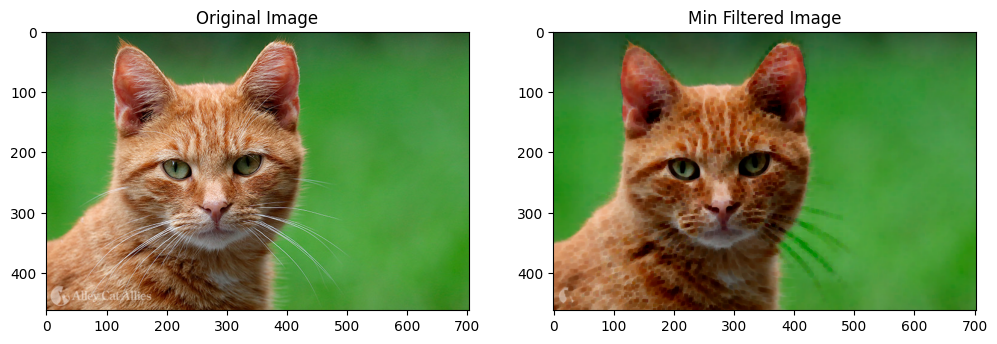

In [18]:
def minFilter(img_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    kernel_size = 5
    pad = kernel_size // 2
    padded_img = cv.copyMakeBorder(img, pad, pad, pad, pad, cv.BORDER_REFLECT)
    height, width, channels = img.shape
    min_filtered_img = np.zeros_like(img)

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = padded_img[i:i + kernel_size, j:j + kernel_size, c]
                min_filtered_img[i, j, c] = np.min(region)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(min_filtered_img)
    plt.title("Min Filtered Image")
    plt.show()

minFilter("img.jpg")
